In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
pd_data = pd.read_csv('Affairs.csv')
print(pd_data.info(memory_usage=True))
pd_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 10 columns):
Unnamed: 0       601 non-null int64
affairs          601 non-null int64
gender           601 non-null object
age              601 non-null float64
yearsmarried     601 non-null float64
children         601 non-null object
religiousness    601 non-null int64
education        601 non-null int64
occupation       601 non-null int64
rating           601 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 47.0+ KB
None


,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3


In [3]:
pd_data['affairs_1'] = (pd_data['affairs'] > 0 ).astype('int')

In [4]:
pd_data['gender_1'] = pd_data['gender'].map({'male': 1, 'female': 0})

In [5]:
pd_data['children_1'] = pd_data['children'].map({'yes': 1, 'no': 0})

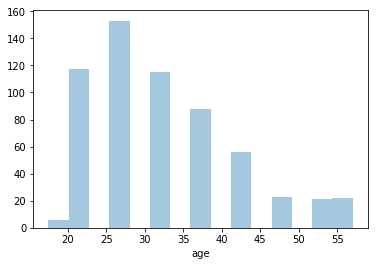

In [6]:
sns.distplot(pd_data['age'], hist=True, bins=15, kde=False)

In [7]:
pd_data['age'].describe()

count    601.000000
mean      32.487521
std        9.288762
min       17.500000
25%       27.000000
50%       32.000000
75%       37.000000
max       57.000000
Name: age, dtype: float64

In [8]:
# age bin and one_hot
bins = np.arange(15,61,5)
age_one_hot = pd.get_dummies(pd.cut(pd_data['age'], bins=bins))
pd_data[['age_onehot_'+n for n in np.arange(len(bins)-1).astype(str)]] = age_one_hot

In [9]:
pd_data.columns

Index(['Unnamed: 0', 'affairs', 'gender', 'age', 'yearsmarried', 'children',
       'religiousness', 'education', 'occupation', 'rating', 'affairs_1',
       'gender_1', 'children_1', 'age_onehot_0', 'age_onehot_1',
       'age_onehot_2', 'age_onehot_3', 'age_onehot_4', 'age_onehot_5',
       'age_onehot_6', 'age_onehot_7', 'age_onehot_8'],
      dtype='object')

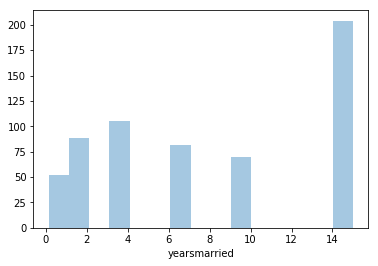

In [10]:
sns.distplot(pd_data['yearsmarried'], hist=True, bins=15, kde=False)

In [11]:
pd_data['yearsmarried'].describe()

count    601.000000
mean       8.177696
std        5.571303
min        0.125000
25%        4.000000
50%        7.000000
75%       15.000000
max       15.000000
Name: yearsmarried, dtype: float64

In [12]:
# yearsmarried bin and one_hot
bins = np.arange(0,16,3)
yearsmarried_one_hot = pd.get_dummies(pd.cut(pd_data['yearsmarried'], bins=bins))
pd_data[['yearsmarried_onehot_'+n for n in np.arange(len(bins)-1).astype(str)]] = yearsmarried_one_hot

In [13]:
# religiousness one_hot
religiousness_one_hot = pd.get_dummies(pd_data['religiousness'])
pd_data[['religiousness_onehot_'+n for n in religiousness_one_hot.columns.astype(str)]] = religiousness_one_hot

In [14]:
# occupation one_hot
occupation_one_hot = pd.get_dummies(pd_data['occupation'])
pd_data[['occupation_onehot_'+n for n in occupation_one_hot.columns.astype(str)]] = occupation_one_hot

In [15]:
# education one_hot
education_one_hot = pd.get_dummies(pd_data['education'])
pd_data[['education_onehot_'+n for n in education_one_hot.columns.astype(str)]] = education_one_hot

In [16]:
# rating 归一化
pd_data['rating_1'] = pd.Series(MinMaxScaler().fit_transform(pd_data['rating'].values.reshape(-1,1)).reshape(-1,))

In [17]:
pd_data.columns

Index(['Unnamed: 0', 'affairs', 'gender', 'age', 'yearsmarried', 'children',
       'religiousness', 'education', 'occupation', 'rating', 'affairs_1',
       'gender_1', 'children_1', 'age_onehot_0', 'age_onehot_1',
       'age_onehot_2', 'age_onehot_3', 'age_onehot_4', 'age_onehot_5',
       'age_onehot_6', 'age_onehot_7', 'age_onehot_8', 'yearsmarried_onehot_0',
       'yearsmarried_onehot_1', 'yearsmarried_onehot_2',
       'yearsmarried_onehot_3', 'yearsmarried_onehot_4',
       'religiousness_onehot_1', 'religiousness_onehot_2',
       'religiousness_onehot_3', 'religiousness_onehot_4',
       'religiousness_onehot_5', 'occupation_onehot_1', 'occupation_onehot_2',
       'occupation_onehot_3', 'occupation_onehot_4', 'occupation_onehot_5',
       'occupation_onehot_6', 'occupation_onehot_7', 'education_onehot_9',
       'education_onehot_12', 'education_onehot_14', 'education_onehot_16',
       'education_onehot_17', 'education_onehot_18', 'education_onehot_20',
       'rating_1'],

In [18]:
pd_data.max(axis=0)

Unnamed: 0                9029
affairs                     12
gender                    male
age                         57
yearsmarried                15
children                   yes
religiousness                5
education                   20
occupation                   7
rating                       5
affairs_1                    1
gender_1                     1
children_1                   1
age_onehot_0                 1
age_onehot_1                 1
age_onehot_2                 1
age_onehot_3                 1
age_onehot_4                 1
age_onehot_5                 1
age_onehot_6                 1
age_onehot_7                 1
age_onehot_8                 1
yearsmarried_onehot_0        1
yearsmarried_onehot_1        1
yearsmarried_onehot_2        1
yearsmarried_onehot_3        1
yearsmarried_onehot_4        1
religiousness_onehot_1       1
religiousness_onehot_2       1
religiousness_onehot_3       1
religiousness_onehot_4       1
religiousness_onehot_5       1
occupati

In [19]:
pd_data.shape

(601, 47)

In [20]:
new_data = pd_data.iloc[:, 10:]

In [21]:
new_data.columns

Index(['affairs_1', 'gender_1', 'children_1', 'age_onehot_0', 'age_onehot_1',
       'age_onehot_2', 'age_onehot_3', 'age_onehot_4', 'age_onehot_5',
       'age_onehot_6', 'age_onehot_7', 'age_onehot_8', 'yearsmarried_onehot_0',
       'yearsmarried_onehot_1', 'yearsmarried_onehot_2',
       'yearsmarried_onehot_3', 'yearsmarried_onehot_4',
       'religiousness_onehot_1', 'religiousness_onehot_2',
       'religiousness_onehot_3', 'religiousness_onehot_4',
       'religiousness_onehot_5', 'occupation_onehot_1', 'occupation_onehot_2',
       'occupation_onehot_3', 'occupation_onehot_4', 'occupation_onehot_5',
       'occupation_onehot_6', 'occupation_onehot_7', 'education_onehot_9',
       'education_onehot_12', 'education_onehot_14', 'education_onehot_16',
       'education_onehot_17', 'education_onehot_18', 'education_onehot_20',
       'rating_1'],
      dtype='object')

In [22]:
new_data.head()

,affairs_1,gender_1,children_1,age_onehot_0,age_onehot_1,age_onehot_2,age_onehot_3,age_onehot_4,age_onehot_5,age_onehot_6,...,occupation_onehot_6,occupation_onehot_7,education_onehot_9,education_onehot_12,education_onehot_14,education_onehot_16,education_onehot_17,education_onehot_18,education_onehot_20,rating_1
0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0.75
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0.75
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0.75
3,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1.00
4,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0.50


In [23]:
x_train, x_test, y_train, y_test = train_test_split(new_data.drop(['affairs_1'], axis=1), new_data['affairs_1'], test_size=0.2, random_state=0)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((480, 36), (121, 36), (480,), (121,))

In [46]:
# keras 构建多层感知机
model = Sequential()
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= 'rmsprop',
              metrics=['accuracy'])
model.fit(x_train, y_train,
          epochs=500,
          batch_size=1)
score = model.evaluate(x_test, y_test)

Epoch 1/500
480/480 [==============================] - 3s 5ms/step - loss: 0.6640 - acc: 0.6458
Epoch 2/500
480/480 [==============================] - 1s 2ms/step - loss: 0.6053 - acc: 0.7354
Epoch 3/500
480/480 [==============================] - 1s 2ms/step - loss: 0.6012 - acc: 0.7396
Epoch 4/500
480/480 [==============================] - 1s 2ms/step - loss: 0.6073 - acc: 0.7396
Epoch 5/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5831 - acc: 0.7396
Epoch 6/500
480/480 [==============================] - 1s 2ms/step - loss: 0.6237 - acc: 0.7396
Epoch 7/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5863 - acc: 0.7396
Epoch 8/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5873 - acc: 0.7396
Epoch 9/500
480/480 [==============================] - 1s 2ms/step - loss: 0.6050 - acc: 0.7396
Epoch 10/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5908 - acc: 0.7396
Epoch 11/500
480/480 [=================

480/480 [==============================] - 1s 2ms/step - loss: 0.5934 - acc: 0.7458
Epoch 169/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5953 - acc: 0.7229
Epoch 170/500
480/480 [==============================] - 1s 2ms/step - loss: 0.6013 - acc: 0.7104
Epoch 171/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5969 - acc: 0.7333
Epoch 172/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5961 - acc: 0.7333
Epoch 173/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5882 - acc: 0.7479
Epoch 174/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5648 - acc: 0.7104
Epoch 175/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5721 - acc: 0.7125
Epoch 176/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5893 - acc: 0.7375
Epoch 177/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5842 - acc: 0.7250
Epoch 178/500
480/480 [===========

480/480 [==============================] - 1s 2ms/step - loss: 0.5936 - acc: 0.7312
Epoch 335/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5760 - acc: 0.7542
Epoch 336/500
480/480 [==============================] - 1s 2ms/step - loss: 0.6020 - acc: 0.7375
Epoch 337/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5727 - acc: 0.7542
Epoch 338/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5946 - acc: 0.7396
Epoch 339/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5765 - acc: 0.7354
Epoch 340/500
480/480 [==============================] - 1s 2ms/step - loss: 0.6073 - acc: 0.7208
Epoch 341/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5733 - acc: 0.7125
Epoch 342/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5774 - acc: 0.7396
Epoch 343/500
480/480 [==============================] - 1s 2ms/step - loss: 0.5873 - acc: 0.7229
Epoch 344/500
480/480 [===========

121/121 [==============================] - 0s 2ms/step


In [47]:
score

[0.5347461966443653, 0.7933884277816646]

In [77]:
from sklearn.metrics import auc,f1_score,accuracy_score

In [52]:
confusion_matrix(model.predict(x_test)>0.2, y_test)

array([[75, 13],
       [21, 12]])

In [71]:
th = np.linspace(0, 1, 1000)
au = [f1_score(model.predict(x_test)>t, y_test) for t in th]

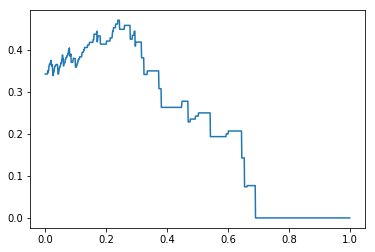

In [72]:
plt.plot(th, au)

In [74]:
i = np.argmax(au)
i

238

In [75]:
th[i]

0.23823823823823823

In [76]:
confusion_matrix(model.predict(x_test)>th[i], y_test)

array([[82, 13],
       [14, 12]])

In [78]:
accuracy_score(model.predict(x_test)>th[i], y_test)

0.7768595041322314